In [5]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)          # features + target as DataFrame
df = iris.frame                          # columns: sepal length (cm), ... , target
print(df.head())
print("Shape:", df.shape)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Shape: (150, 5)


target_name
setosa        50
versicolor    50
virginica     50
dtype: int64


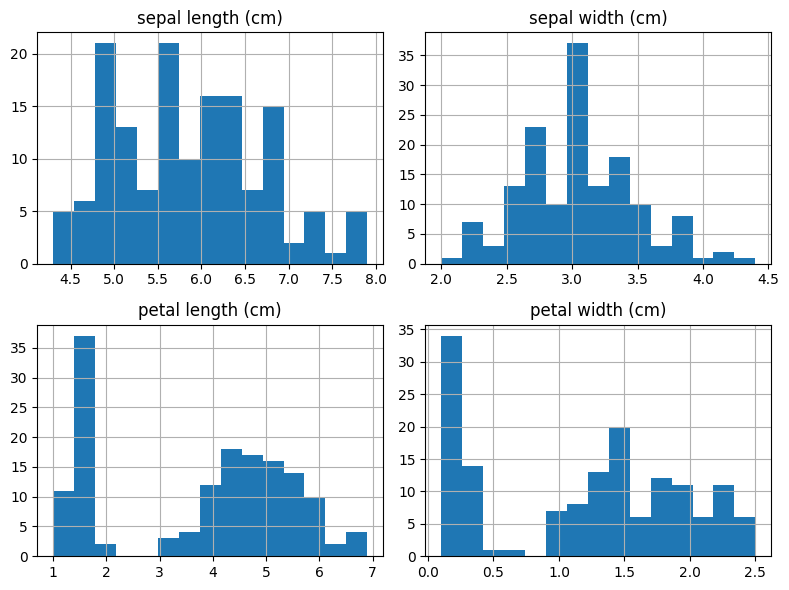

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))
print(df.groupby('target_name').size())

# Feature histograms (quick look)
df[iris.feature_names].hist(figsize=(8,6), bins=15)
plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(120, 4) (30, 4)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=200, random_state=42)
dt_model  = DecisionTreeClassifier(random_state=42)
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42)

log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracies
y_pred_log = log_model.predict(X_test)
y_pred_dt  = dt_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:",      accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:",      accuracy_score(y_test, y_pred_rf))

# Detailed report for Random Forest (usually best)
print("\nClassification Report (Random Forest):\n",
      classification_report(y_test, y_pred_rf, target_names=iris.target_names))


Logistic Regression Accuracy: 0.9666666666666667
Decision Tree Accuracy: 0.9333333333333333
Random Forest Accuracy: 0.9

Classification Report (Random Forest):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



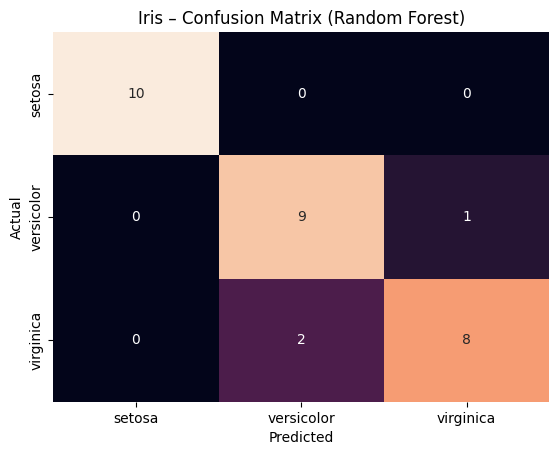

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Iris – Confusion Matrix (Random Forest)")
plt.show()


In [11]:
import joblib
joblib.dump(rf_model, "iris_rf_model.pkl")
print("Saved -> iris_rf_model.pkl")


Saved -> iris_rf_model.pkl


In [12]:
import numpy as np
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # sepal len, sepal wid, petal len, petal wid
pred = rf_model.predict(sample)[0]
print("Predicted class:", iris.target_names[pred])


Predicted class: setosa


C:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd

sample_df = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
pred = rf_model.predict(sample_df)[0]
print("Predicted class:", iris.target_names[pred])


Predicted class: setosa
